In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
train_data = pd.read_csv('/content/drive/MyDrive/RNN/NETFLIX_STOCK_PREDICTION_MODEL/NETFLIX_STOCK_PRICE.csv')
train_data.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,True,True,True,True,True,True,True
1006,True,True,True,True,True,True,True
1007,True,True,True,True,True,True,True


In [7]:
train_data.dropna(inplace=True)

In [8]:
training_data = train_data.iloc[:,1:2].values
print(training_data)

[[262.      ]
 [247.699997]
 [266.579987]
 ...
 [382.059998]
 [386.76001 ]
 [401.970001]]


In [11]:
len(training_data)

1005

## Feature Scaling using MinMaxScaler

# Normalization

In [10]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1)) # Normalizing by reducing to 0-1
training_scaled_data = sc.fit_transform(training_data)
print(training_scaled_data)


[[0.06125254]
 [0.03005911]
 [0.07124314]
 ...
 [0.32314641]
 [0.33339882]
 [0.36657726]]


# Creating the data structure for X_train data
   ## using 60 timestamps

In [12]:
X_train = []
y_train = []
for i in range(60,1005):
  X_train.append(training_scaled_data[i-60:i, 0])
  y_train.append(training_scaled_data[i,0])
print(X_train,y_train)

[array([0.06125254, 0.03005911, 0.07124314, 0.07233381, 0.04347449,
       0.03974435, 0.05097837, 0.05791507, 0.07876885, 0.09774669,
       0.0955871 , 0.10503242, 0.10898067, 0.10269835, 0.11960388,
       0.13273563, 0.1290928 , 0.12832931, 0.11066029, 0.15036104,
       0.18750957, 0.18777132, 0.19257033, 0.1906725 , 0.21735053,
       0.19621317, 0.18375763, 0.19468625, 0.19086888, 0.17860959,
       0.17306899, 0.17980938, 0.17265452, 0.16030803, 0.16456164,
       0.19320288, 0.1406322 , 0.1157865 , 0.12656241, 0.11240542,
       0.08662175, 0.12920184, 0.12036736, 0.12619155, 0.13908339,
       0.15042648, 0.16534696, 0.18185986, 0.17902405, 0.20884325,
       0.22332743, 0.21586722, 0.21442752, 0.20773073, 0.18606986,
       0.1580394 , 0.16595774, 0.17959123, 0.16829181, 0.16674299]), array([0.03005911, 0.07124314, 0.07233381, 0.04347449, 0.03974435,
       0.05097837, 0.05791507, 0.07876885, 0.09774669, 0.0955871 ,
       0.10503242, 0.10898067, 0.10269835, 0.11960388, 0.13

# Converting the data structure into nd.array

In [13]:
X_train , y_train = np.array(X_train) , np.array(y_train)

# Reshaping the X_train into 3D structure based on time stamps,batch_size and indicators


In [16]:
X_train = np.reshape(X_train , (X_train.shape[0] , X_train.shape[1] , 1))
print(X_train)

[[[0.06125254]
  [0.03005911]
  [0.07124314]
  ...
  [0.17959123]
  [0.16829181]
  [0.16674299]]

 [[0.03005911]
  [0.07124314]
  [0.07233381]
  ...
  [0.16829181]
  [0.16674299]
  [0.16955697]]

 [[0.07124314]
  [0.07233381]
  [0.04347449]
  ...
  [0.16674299]
  [0.16955697]
  [0.17160745]]

 ...

 [[0.99282338]
  [0.97984427]
  [0.96710521]
  ...
  [0.32718193]
  [0.31677688]
  [0.31487904]]

 [[0.97984427]
  [0.96710521]
  [0.98590851]
  ...
  [0.31677688]
  [0.31487904]
  [0.32314641]]

 [[0.96710521]
  [0.98590851]
  [0.93809304]
  ...
  [0.31487904]
  [0.32314641]
  [0.33339882]]]


## Setup the LSTM (RNN) model

In [21]:
import tensorflow as tf

In [22]:
regressor = tf.keras.models.Sequential()

In [25]:
# Adding the first layer of LSTM and dropout for regularization
from keras.layers import LSTM
from keras.layers import Dropout
regressor.add(LSTM(units = 50 , return_sequences= True , input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [26]:
# Adding the NExt two layers
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))


In [27]:
regressor.add(LSTM(units = 50 , return_sequences = True))
regressor.add(Dropout(0.2))

In [28]:
# Adding the Last final LSTM layer
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# OutPut LAyer

In [29]:
# Adding the final output layer
from keras.layers import Dense
regressor.add(Dense(units = 1))

# Compile the LSTM Model

In [32]:
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error')

# Fitting the model

In [33]:
regressor.fit(X_train,y_train,epochs = 100 , batch_size=32)

Epoch 1/100
30/30 [==============================] - 11s 135ms/step - loss: 0.0428
Epoch 2/100
30/30 [==============================] - 4s 117ms/step - loss: 0.0093
Epoch 3/100
30/30 [==============================] - 3s 105ms/step - loss: 0.0076
Epoch 4/100
30/30 [==============================] - 3s 108ms/step - loss: 0.0081
Epoch 5/100
30/30 [==============================] - 5s 164ms/step - loss: 0.0069
Epoch 6/100
30/30 [==============================] - 4s 141ms/step - loss: 0.0073
Epoch 7/100
30/30 [==============================] - 3s 105ms/step - loss: 0.0069
Epoch 8/100
30/30 [==============================] - 3s 103ms/step - loss: 0.0075
Epoch 9/100
30/30 [==============================] - 5s 155ms/step - loss: 0.0057
Epoch 10/100
30/30 [==============================] - 4s 140ms/step - loss: 0.0061
Epoch 11/100
30/30 [==============================] - 4s 126ms/step - loss: 0.0059
Epoch 12/100
30/30 [==============================] - 4s 140ms/step - loss: 0.0053
Epoch 13/100

In [35]:
# Test_Dataset
test_data = pd.read_excel("/content/drive/MyDrive/RNN/NETFLIX_STOCK_PREDICTION_MODEL/NETFLIX_STOCK_PRICE_TEST.xlsx")
real_stock_price = test_data.iloc[:,1:2].values
print(real_stock_price)
total_data = pd.concat((train_data['Open'],test_data['Open']),axis = 0)
input = total_data[len(total_data)-len(test_data)-60:].values
input = input.reshape(-1,1)
input = sc.transform(input)
X_test = []
for i in range(60,64):
  X_test.append(input[i-60:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test , (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

[[432.959991]
 [448.25    ]
 [421.440002]
 [407.309998]]
1/1 [==============================] - 2s 2s/step
[[408.6471 ]
 [424.42133]
 [441.03824]
 [435.68195]]


# VIsualizing the predicted and actual stock price

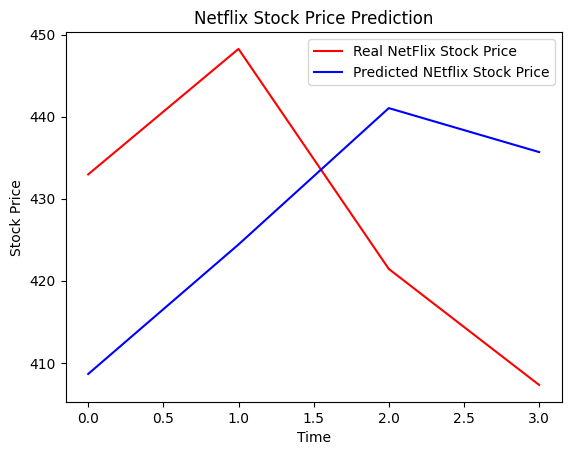

In [36]:
plt.plot(real_stock_price , color = 'red' , label = 'Real NetFlix Stock Price')
plt.plot(predicted_stock_price , color = 'blue' , label = 'Predicted NEtflix Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title("Netflix Stock Price Prediction")
plt.show()